In [10]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

class Perceptron:
    def __init__(self,learning_rate=0.1,n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def activation(self,X):
        return np.where(X>= 0,1,0)
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                linear_output = np.dot(x_i,self.weights)+self.bias
                y_predicted = self.activation(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self,X):
        linear_output = np.dot(X,self.weights)+self.bias
        y_predicted = self.activation(linear_output)
        return y_predicted
    


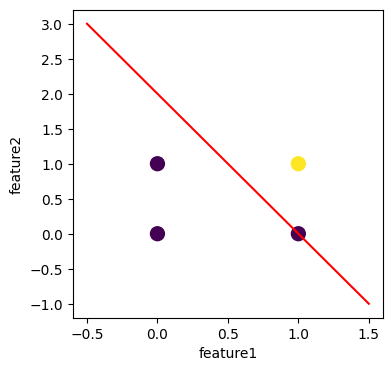

In [14]:
p = Perceptron(learning_rate=0.1,n_iters=10)
p.fit(X,y)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1],c=y,s=100)

x_vals =np.linspace(-0.5,1.5,100)
if p.weights[1] != 0:
    y_vals = -(p.weights[0] * x_vals + p.bias) / p.weights[1]
    plt.plot(x_vals,y_vals,color="red",label="Decision Boundary")
    plt.xlabel("feature1")
    plt.ylabel("feature2")